In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?


<IPython.core.display.Javascript object>


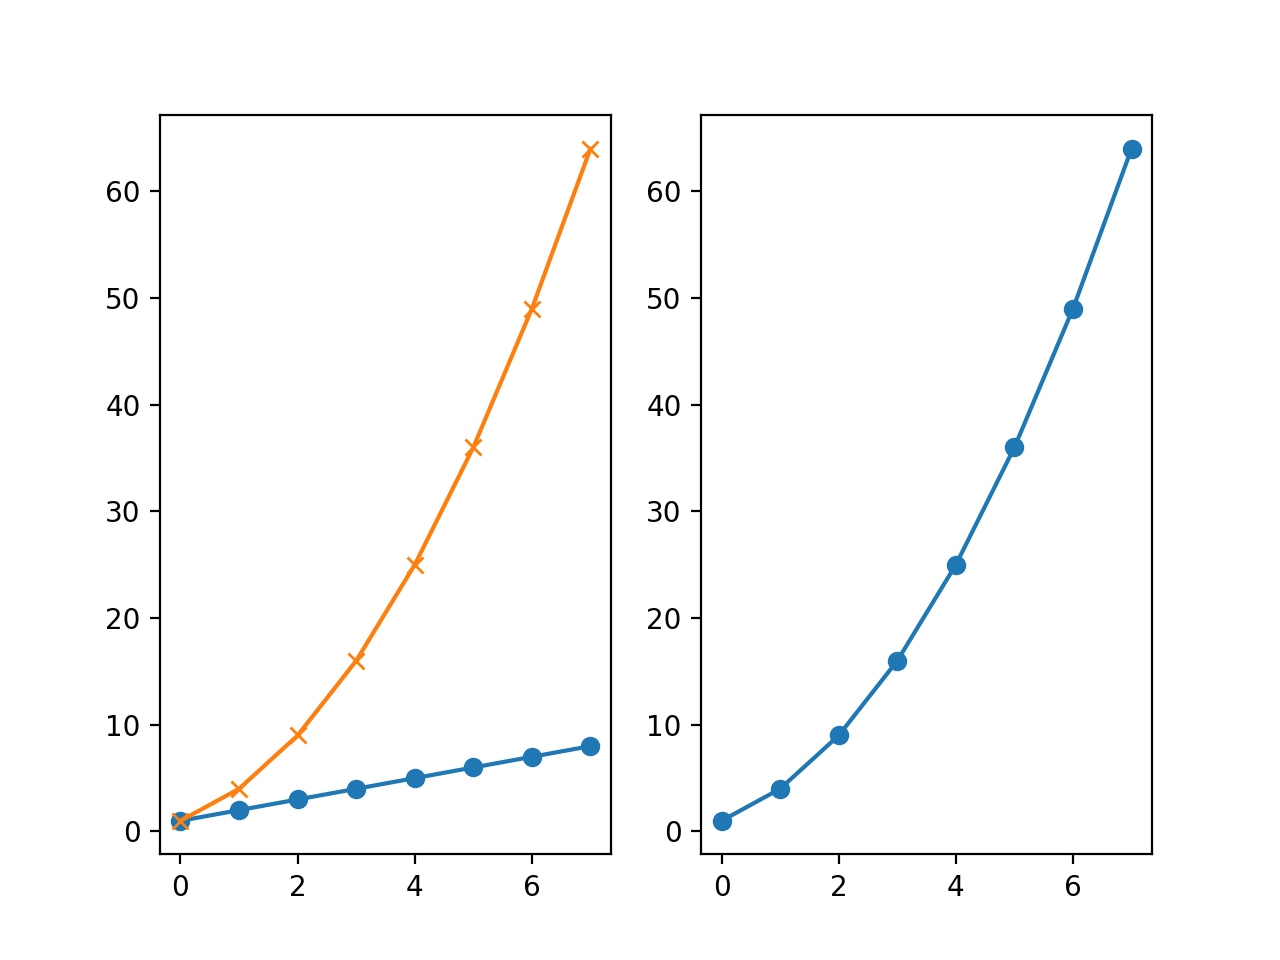

In [4]:
plt.figure()
plt.subplot(1,2,1)

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])

plt.plot(linear_data, '-o')

In [5]:
exponential_data = linear_data**2
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [6]:
plt.subplot(1,2,1)
plt.plot(exponential_data, '-x')

/Users/ritik/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<IPython.core.display.Javascript object>


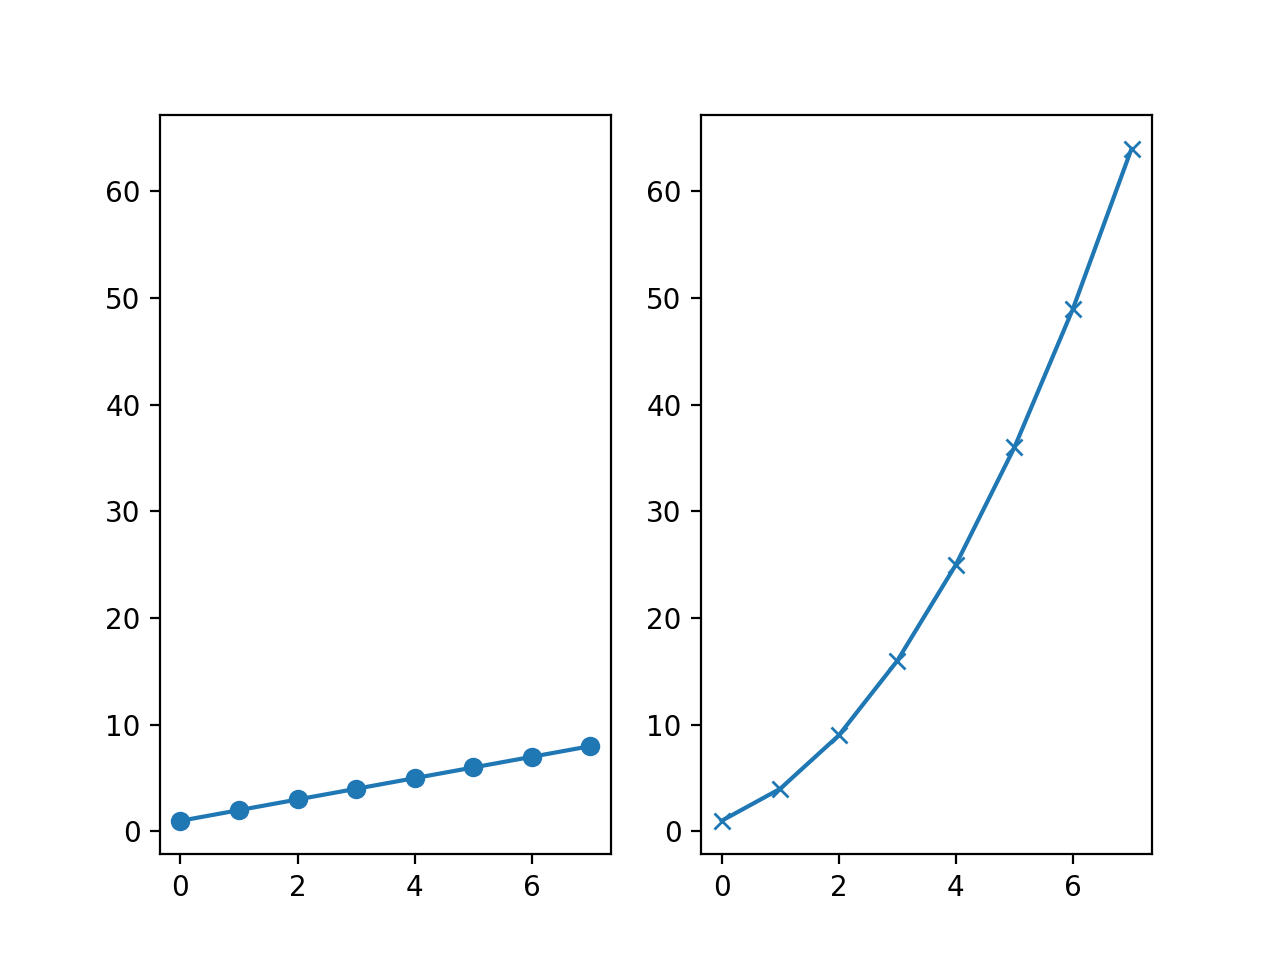

In [7]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
plt.plot(exponential_data, '-x')

In [8]:
plt.subplot(1,2,1) == plt.subplot(121)

True

<IPython.core.display.Javascript object>


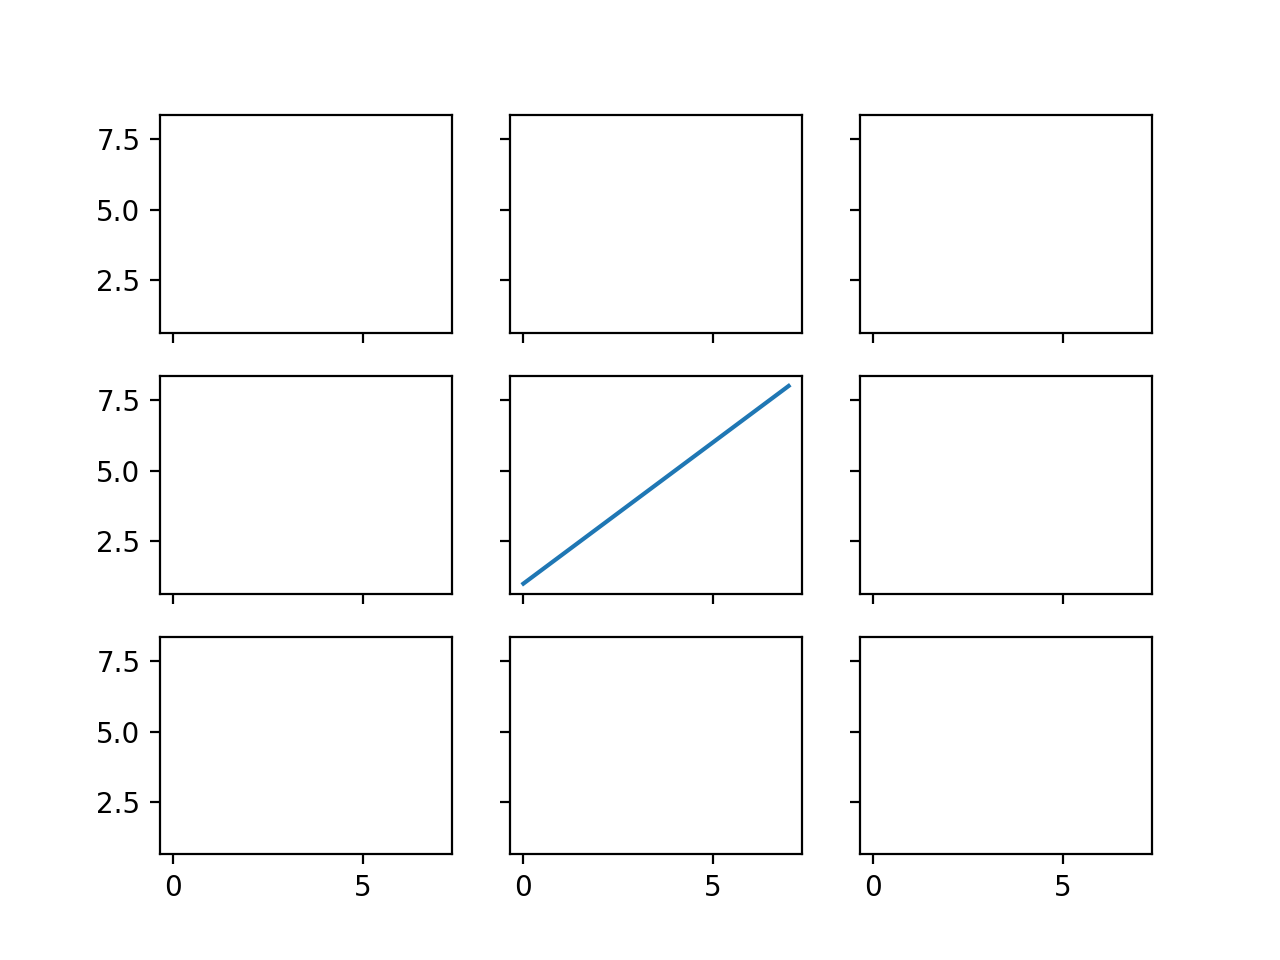

In [15]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3,
                                                                      sharex = True,
                                                                      sharey = True)
ax5.plot(linear_data, '-')

In [20]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [22]:
plt.gcf().canvas.draw()

<IPython.core.display.Javascript object>


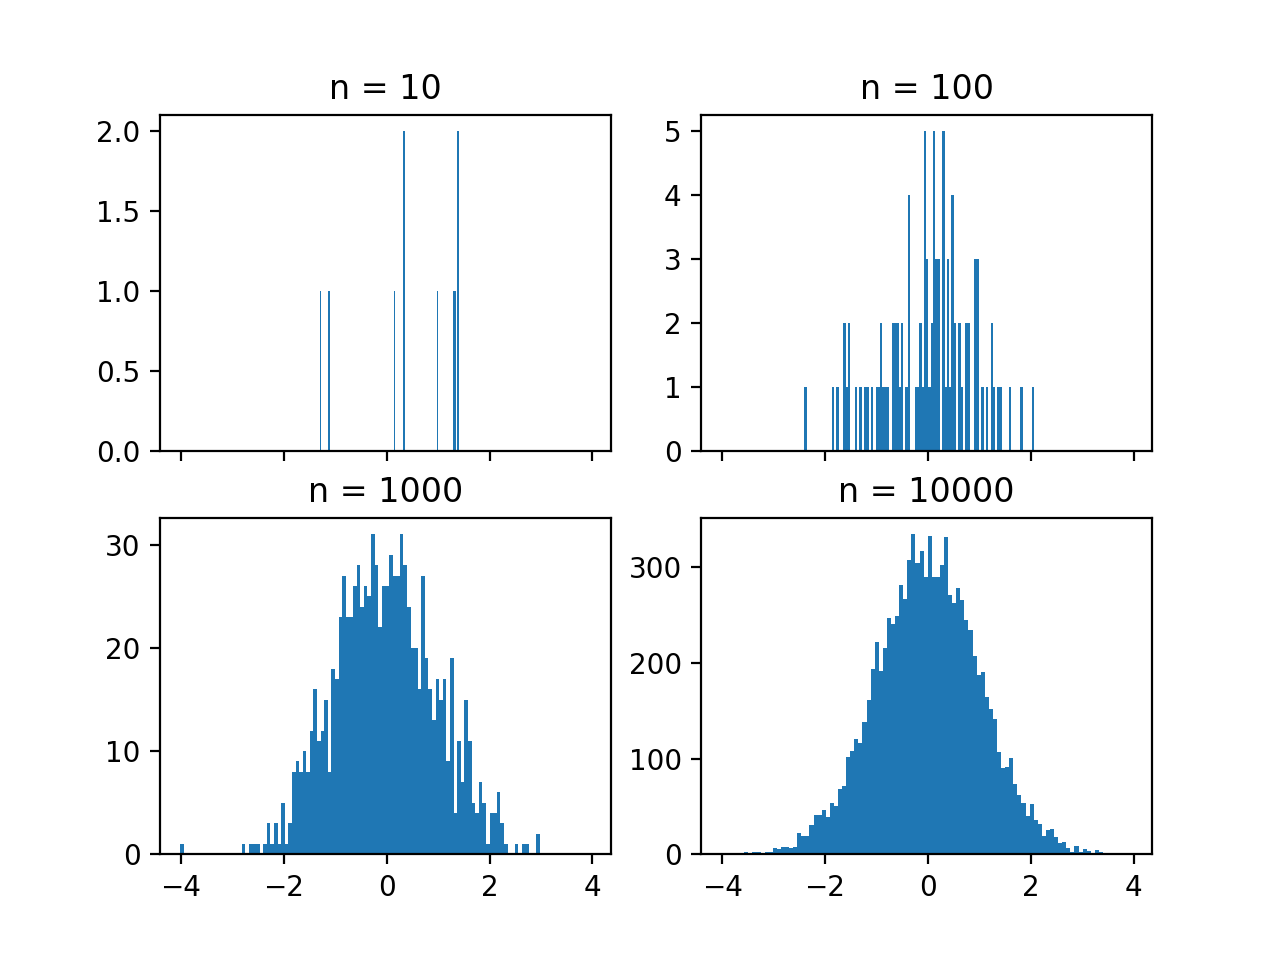

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n = {}'.format(sample_size))

<IPython.core.display.Javascript object>


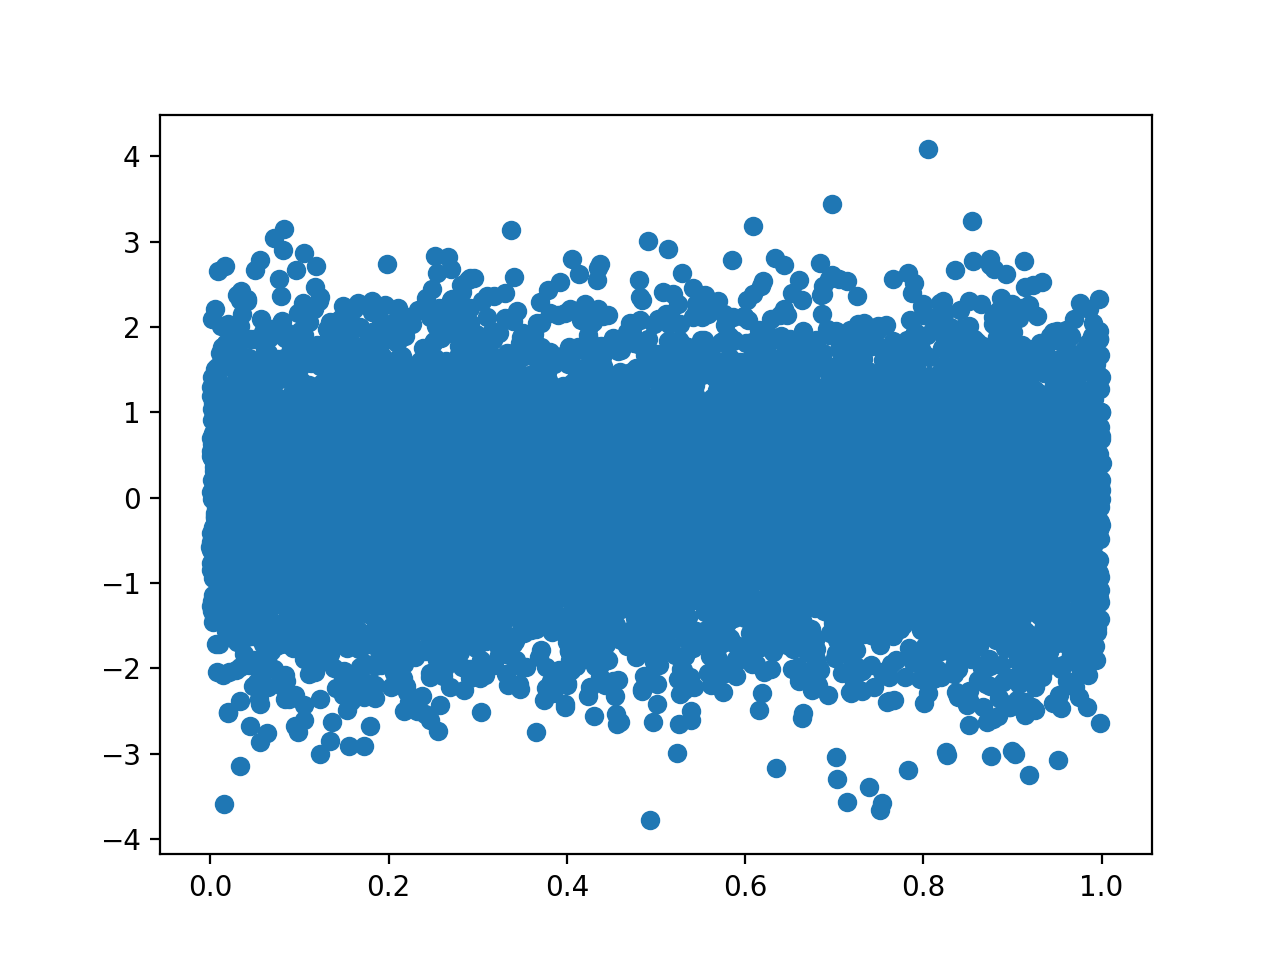

In [25]:
plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


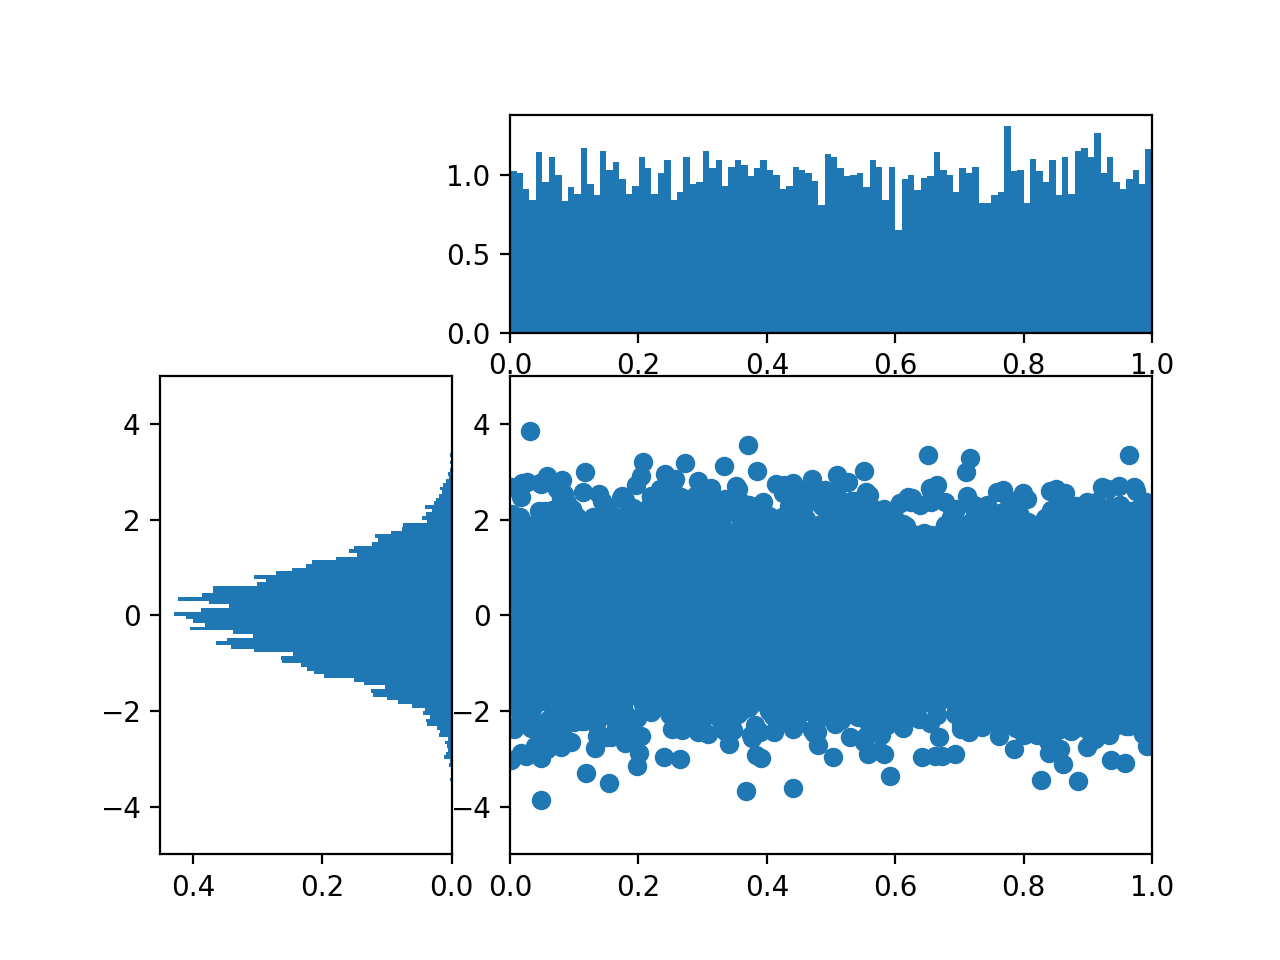

In [26]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [27]:
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins = 100)
s = side_histogram.hist(Y, bins = 100, orientation = 'horizontal')

In [28]:
top_histogram.clear()
top_histogram.hist(X, bins = 100, normed = True)
side_histogram.clear()
side_histogram.hist(Y, bins = 100, orientation = 'horizontal', normed = True)

side_histogram.invert_xaxis()

/Users/ritik/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [29]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0,1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Box plots

In [30]:
import pandas as pd

normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
random_sample = np.random.random(size = 10000)
gamma_sample = np.random.gamma(2, size = 10000)

df = pd.DataFrame({'normal' : normal_sample,
                  'random' : random_sample,
                  'gamma' : gamma_sample})

In [31]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.012109,0.500646,1.967625
std,1.002300,0.285588,1.403595
min,-3.869831,0.000118,0.006776
25%,-0.678841,0.255015,0.946954
50%,0.003145,0.503004,1.649261
75%,0.693553,0.744734,2.651586
max,3.621261,0.999720,12.860142


<IPython.core.display.Javascript object>


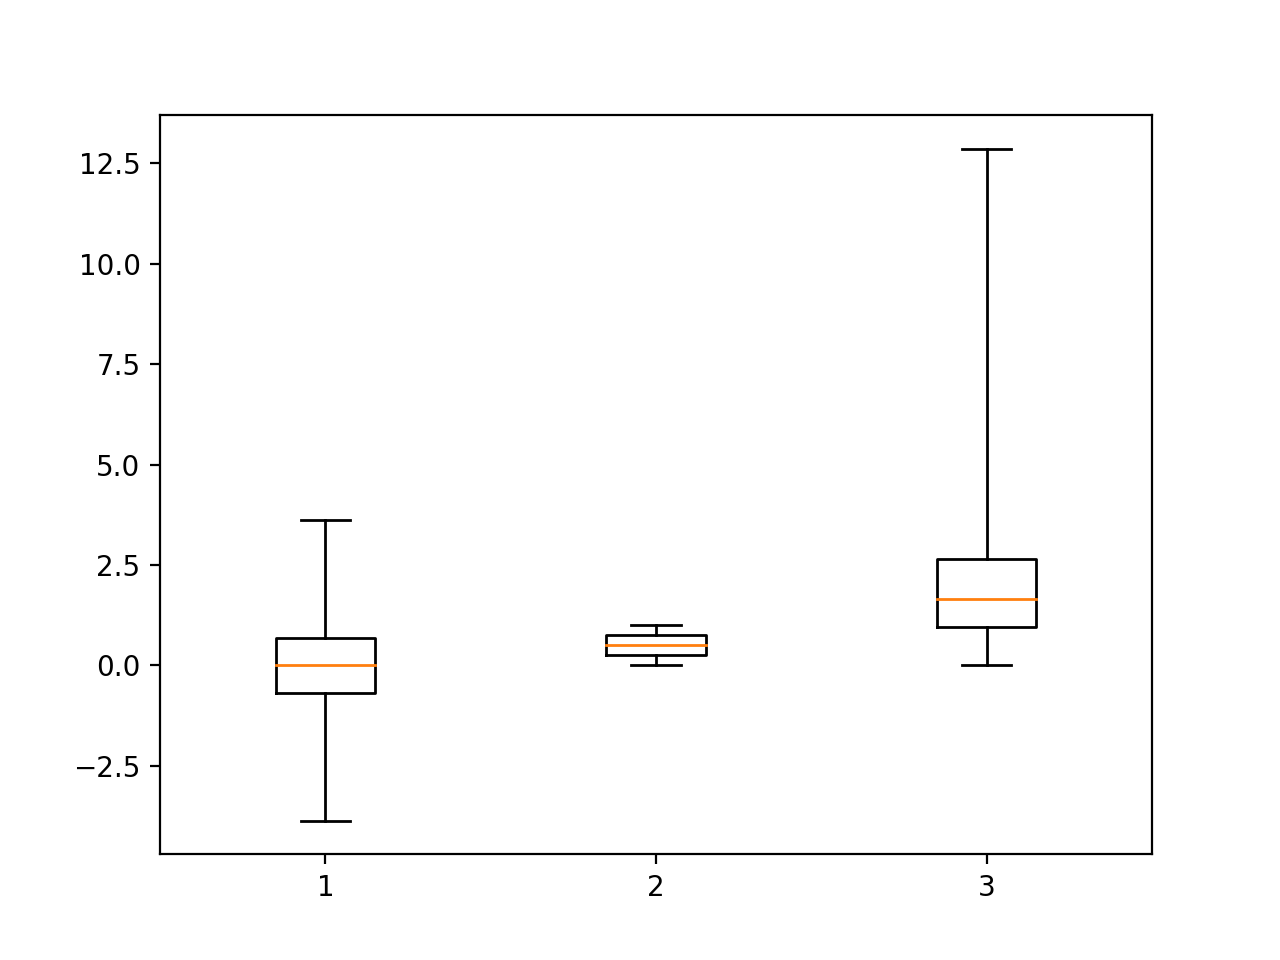

In [32]:
plt.figure()
_ = plt.boxplot(df['normal'], whis = 'range')

In [33]:
plt.clf() #clear the current figure
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')

<IPython.core.display.Javascript object>


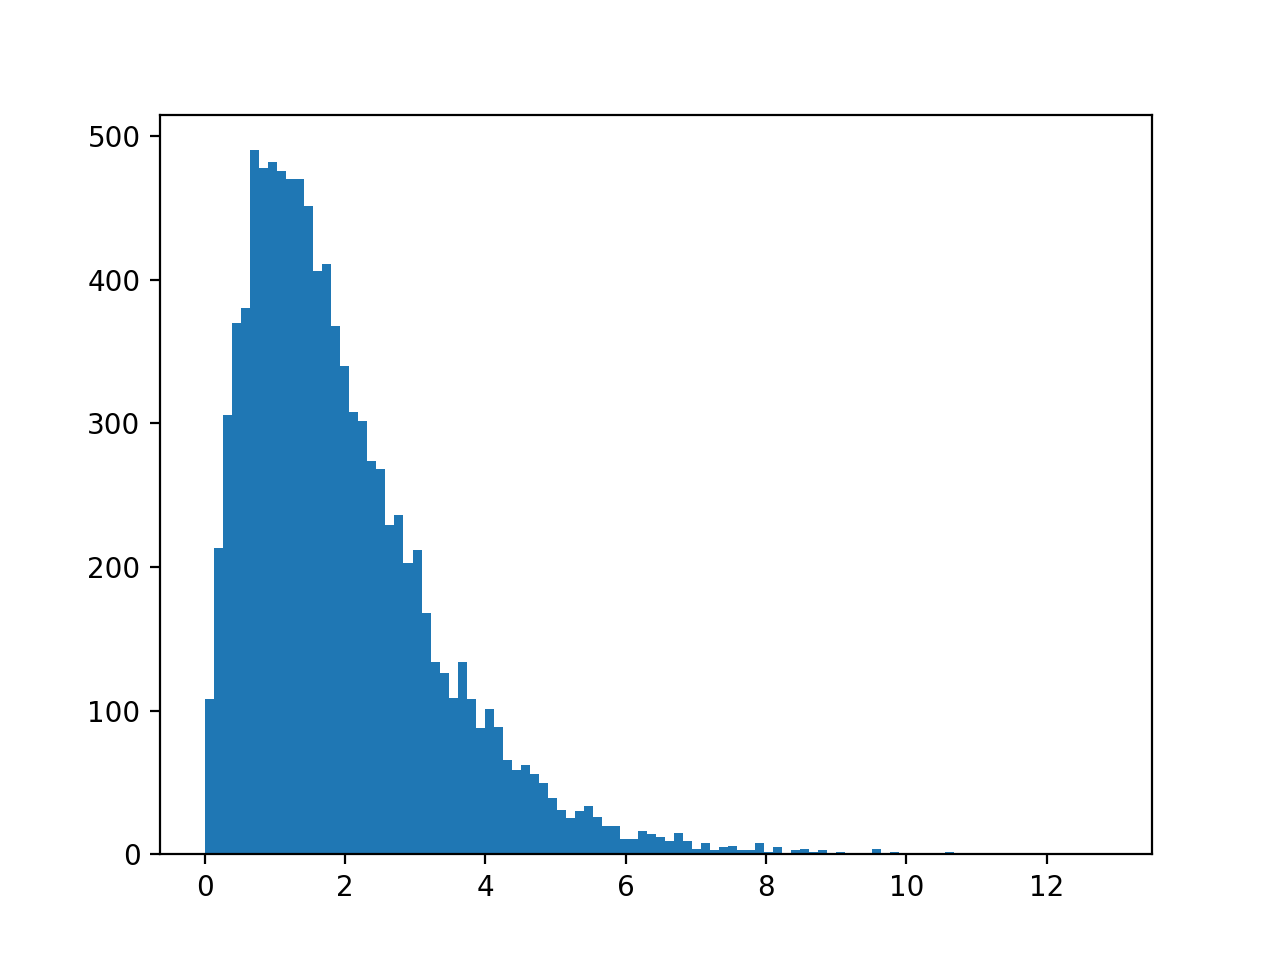

In [34]:
plt.figure()
_ = plt.hist(df['gamma'], bins = 100)

<IPython.core.display.Javascript object>


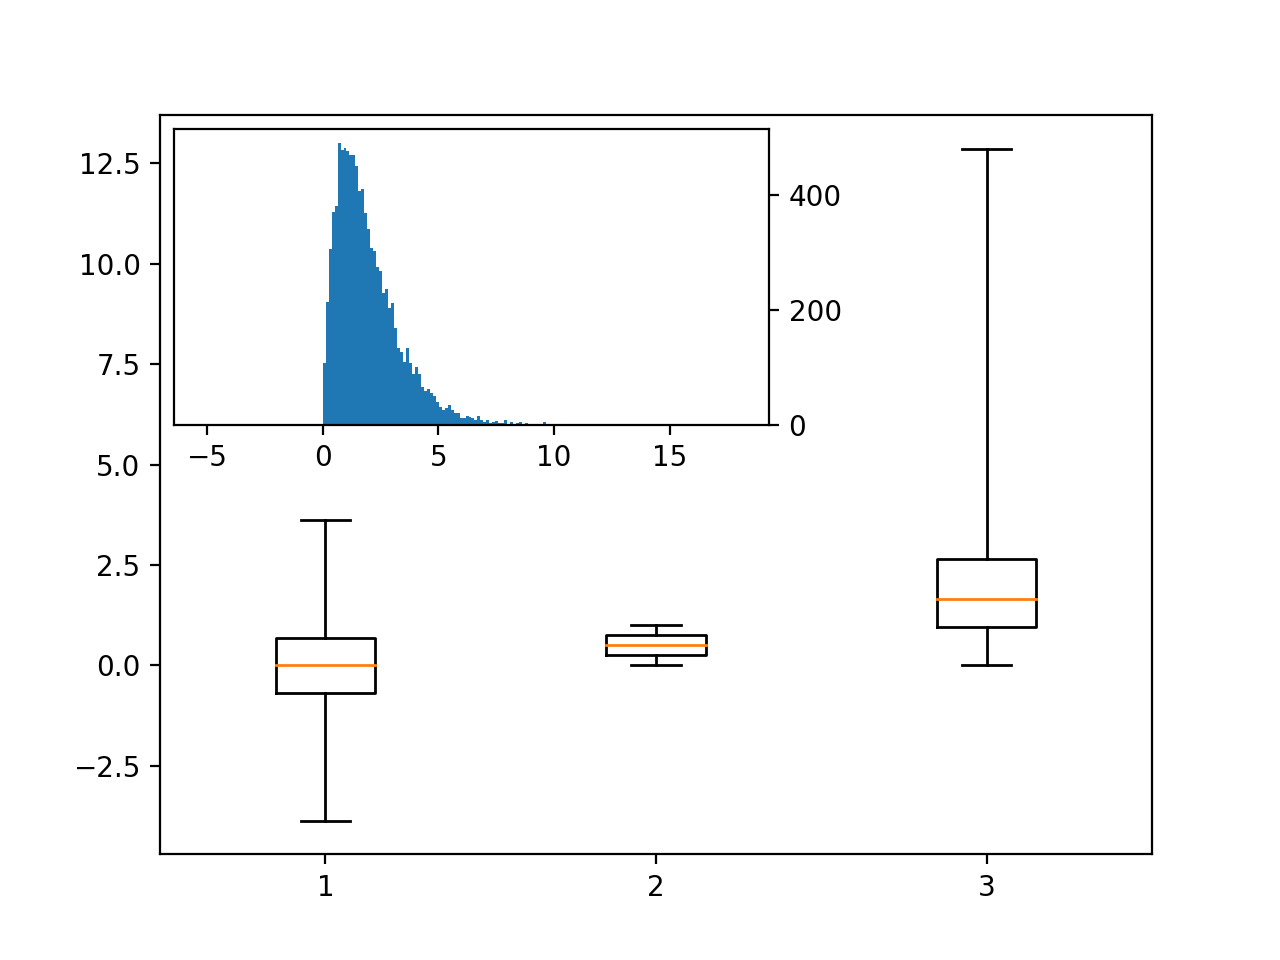

In [38]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2)
ax2.hist(df['gamma'], bins = 100)
ax2.margins(x = 0.5)

In [39]:
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


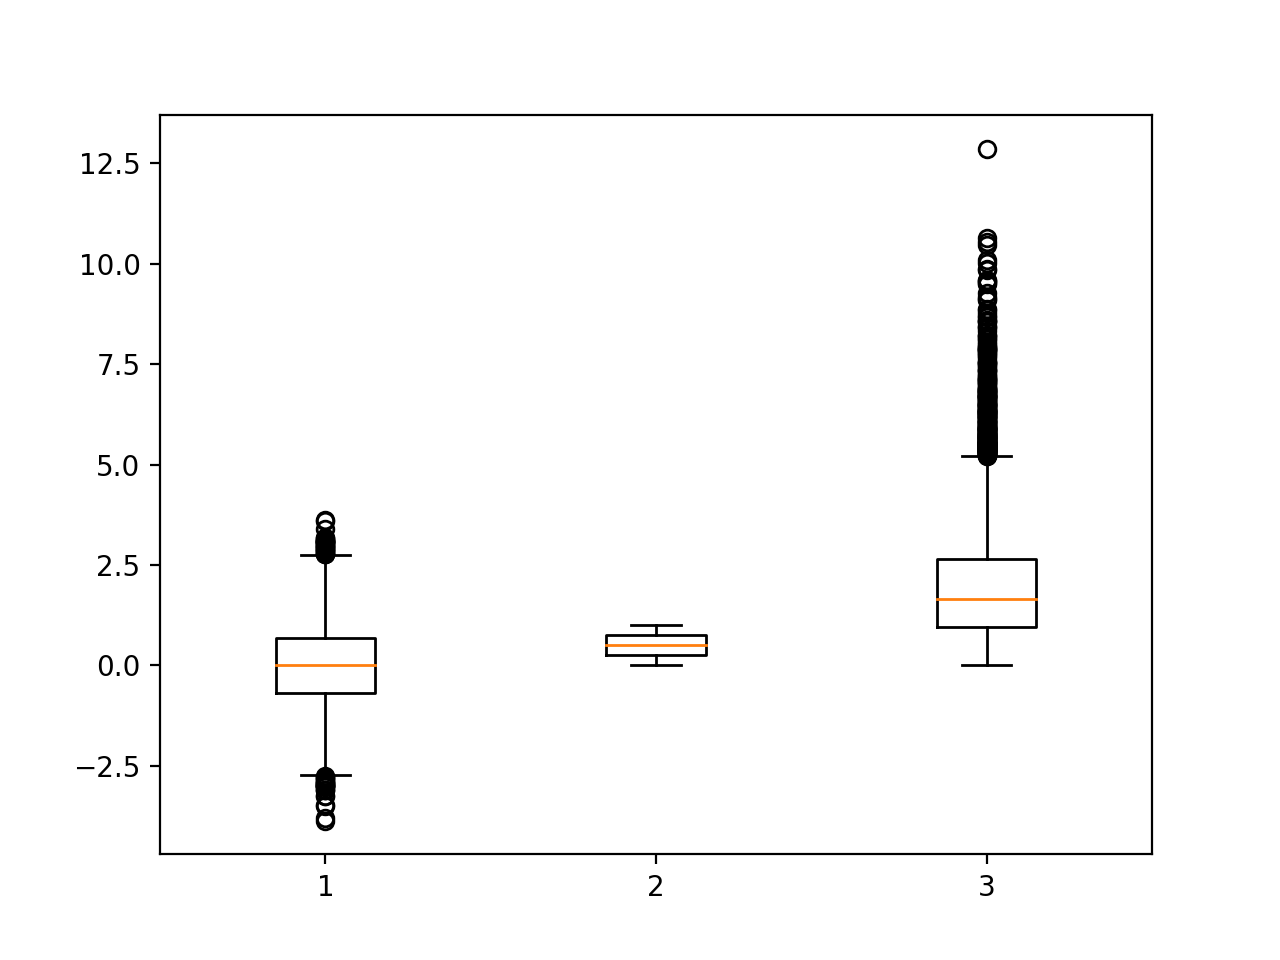

In [40]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

# Heatmaps

<IPython.core.display.Javascript object>


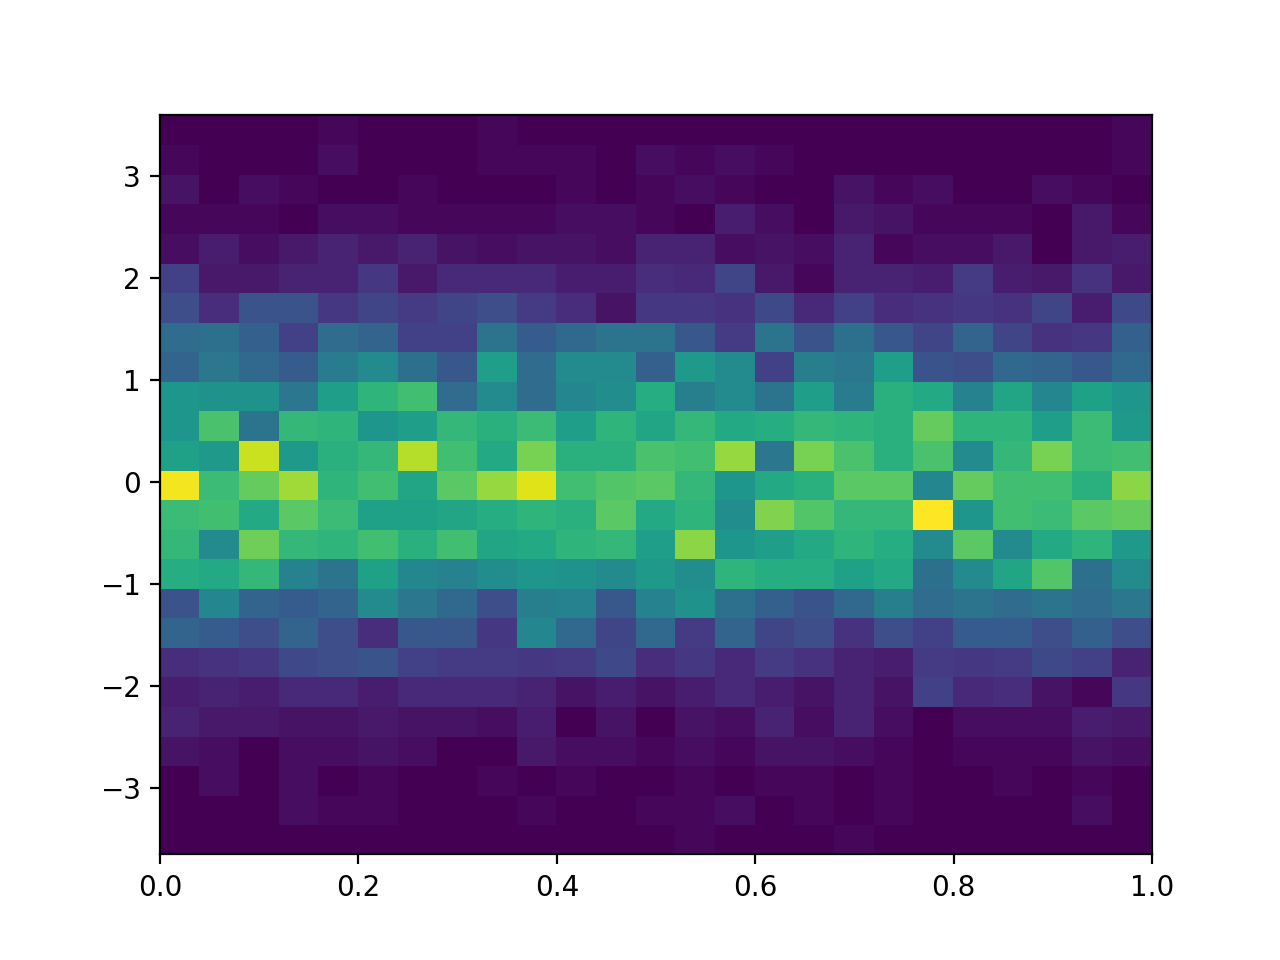

In [41]:
plt.figure()

Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
_ = plt.hist2d(X, Y, bins = 25)

<IPython.core.display.Javascript object>


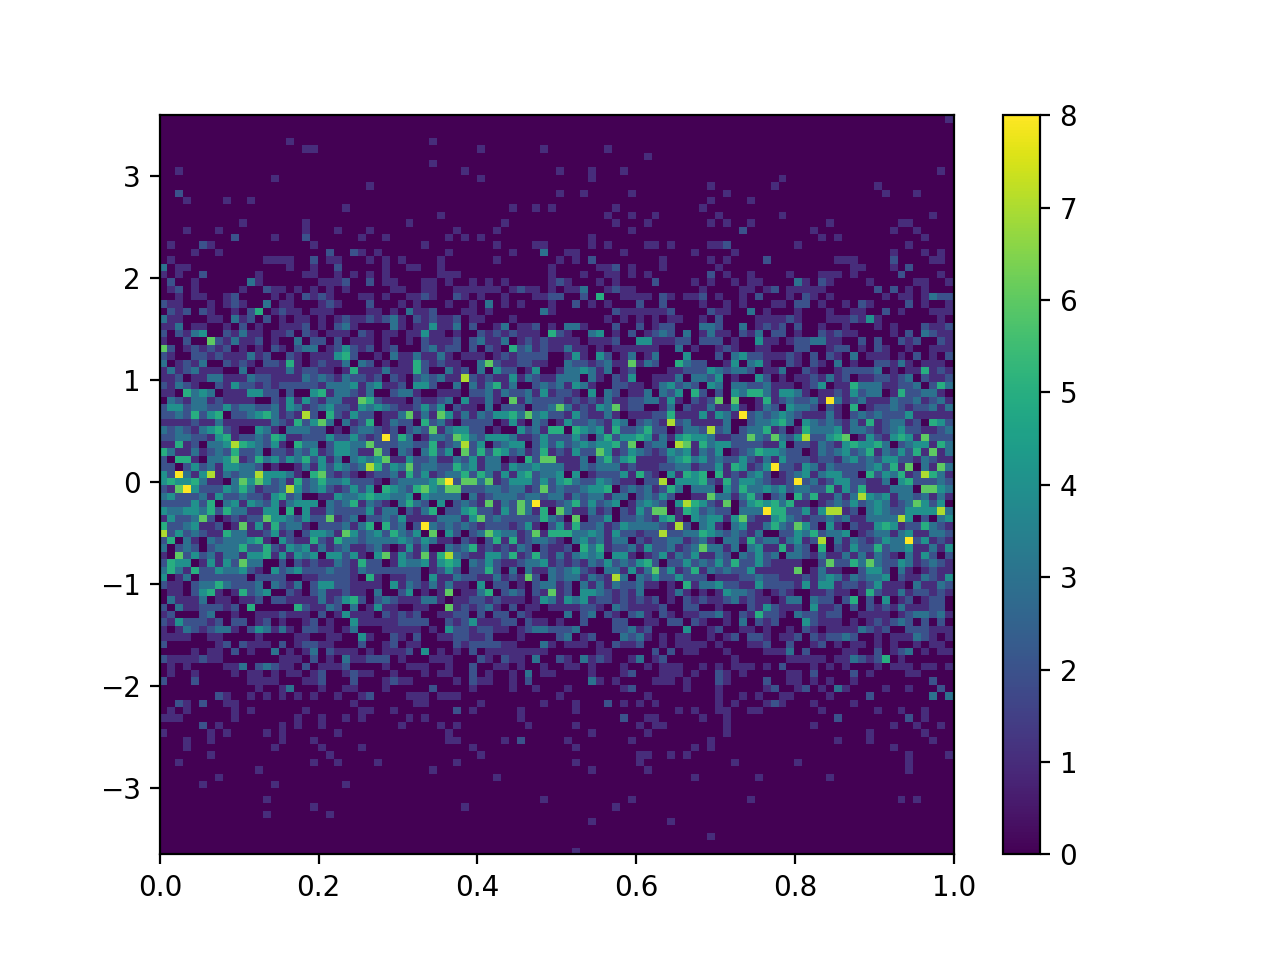

In [43]:
plt.figure()

_ = plt.hist2d(X, Y, bins = 100)

In [44]:
plt.colorbar()

# Animations


In [45]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [49]:
def update(curr):
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


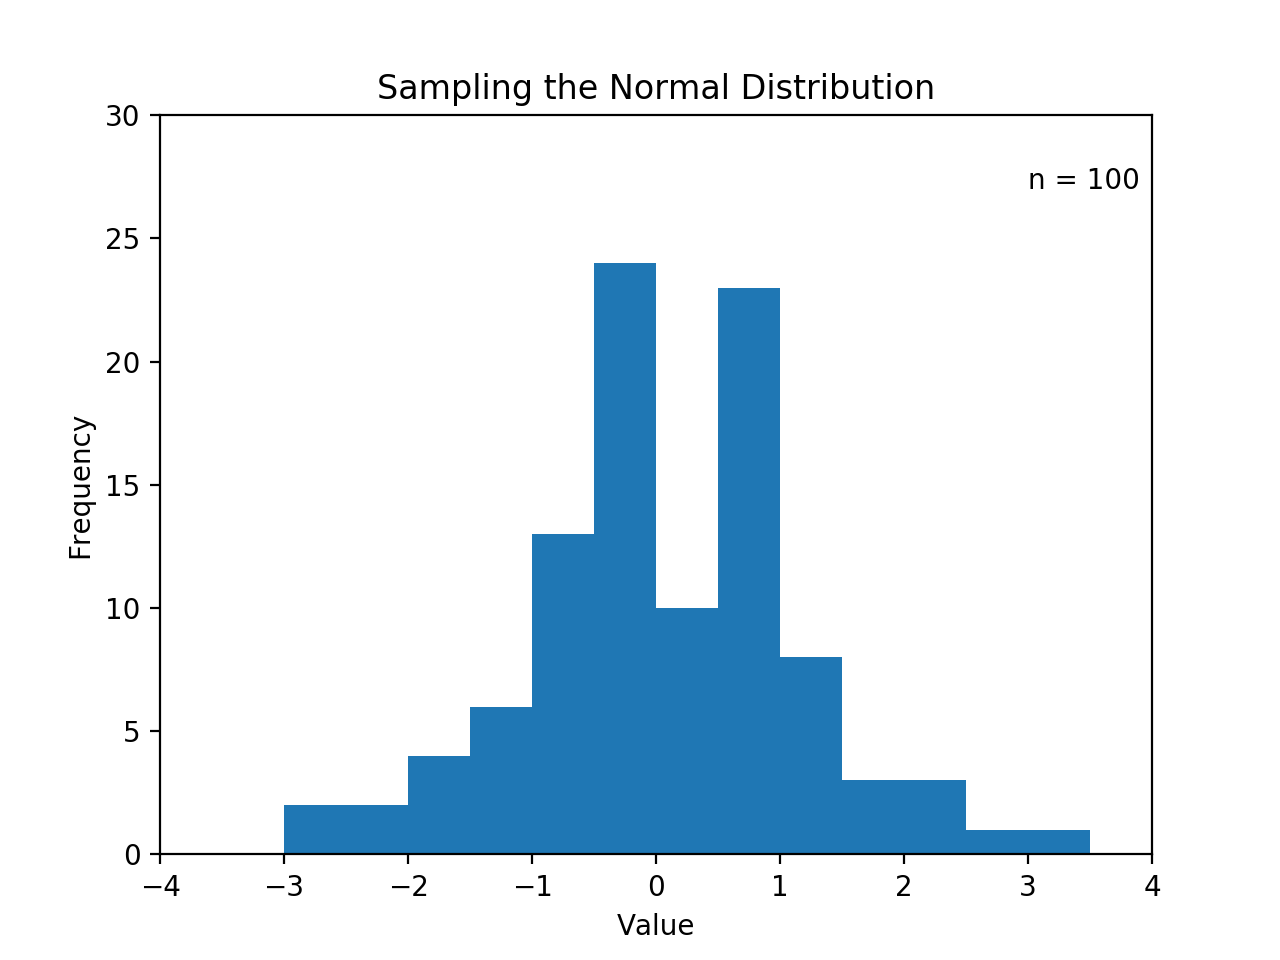

In [51]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


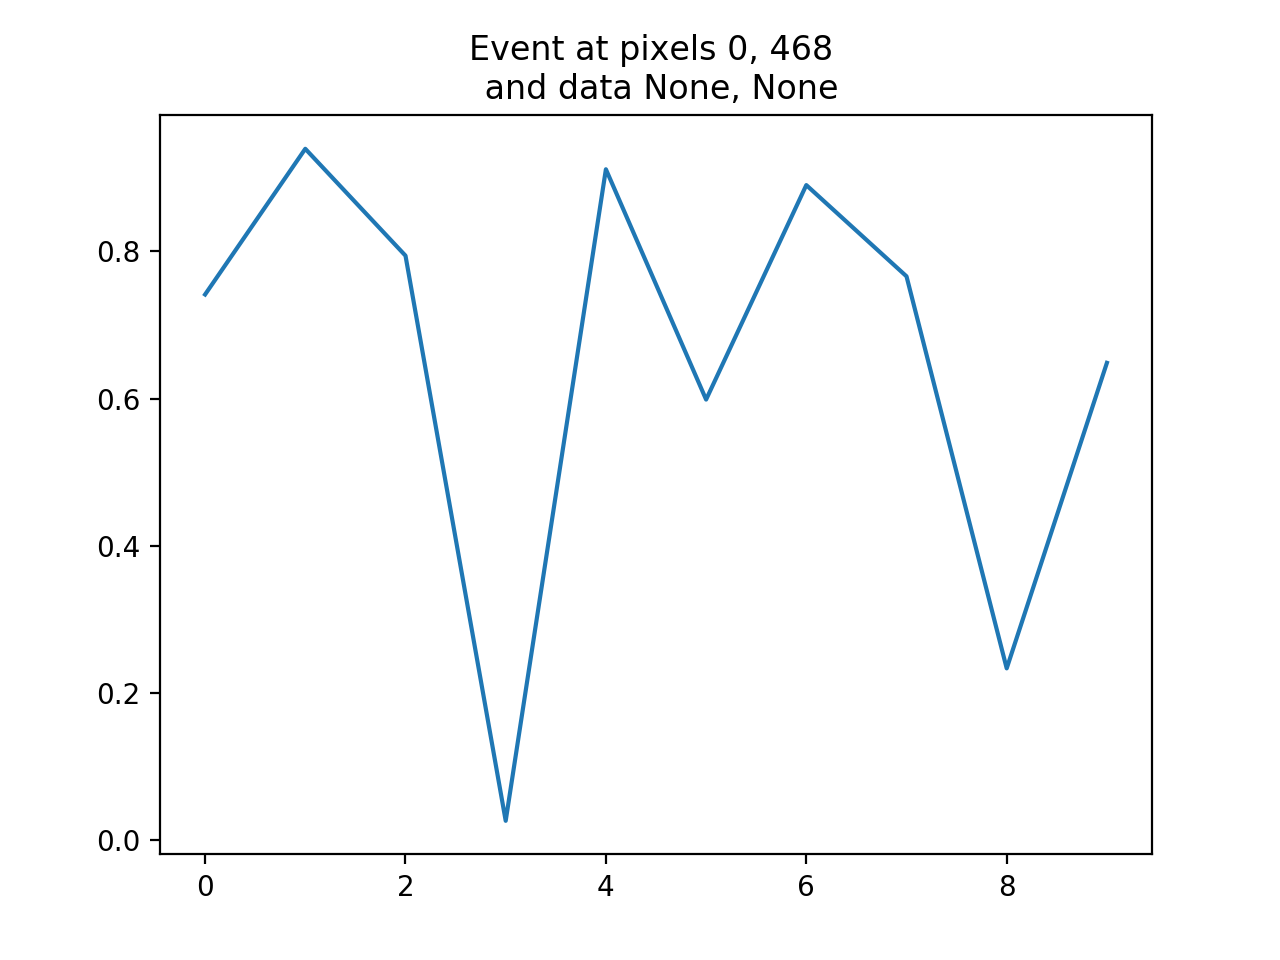

6

In [54]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {}, {} {} and data {}, {}'.format(event.x,
                                                                          event.y,
                                                                          '\n',
                                                                          event.xdata,
                                                                          event.ydata))
    

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [61]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.166937,0.318961,USA
1,0.687021,0.841280,Brazil
2,0.901813,0.379708,Iraq
3,0.851025,0.329382,Canada
4,0.167593,0.851958,Mexico
5,0.826182,0.515340,Germany
6,0.157900,0.446680,India
7,0.074154,0.424970,UK
8,0.985061,0.000054,China
9,0.562373,0.628116,Chile


<IPython.core.display.Javascript object>


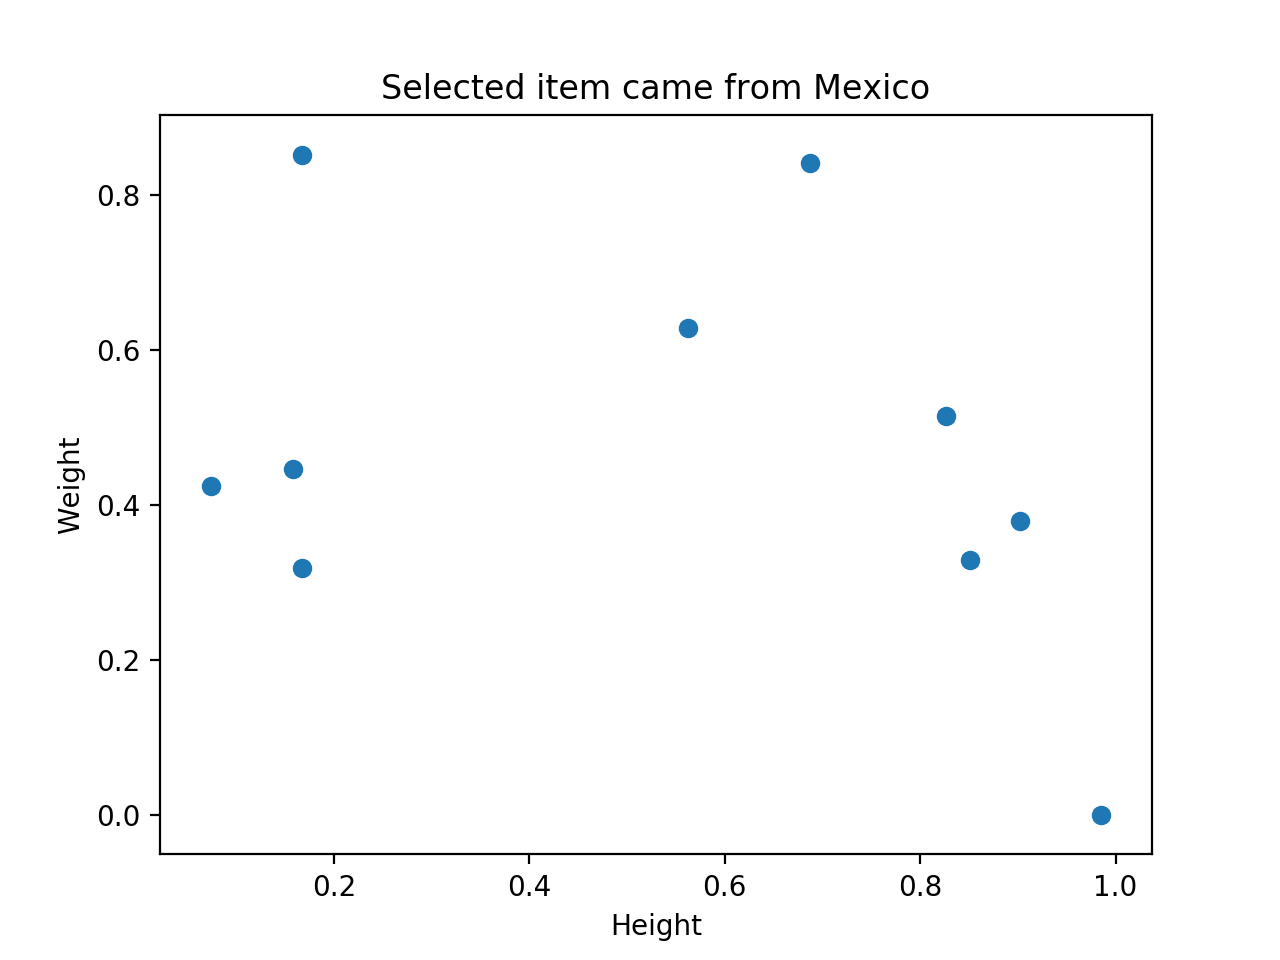

Text(0.5, 0, 'Height')

In [62]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [67]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

plt.gcf().canvas.mpl_connect('pick_event', onpick)

10